## Prerequisite Knowledge  

Before diving into this notebook, it is helpful to have a basic understanding of the following concepts:  

- **Linear Algebra:** Understanding matrix multiplication and dot product will help in following the forward pass computations.  
- **Softmax Function:** The softmax function converts raw model outputs (logits) into probabilities.  
- **Cross-Entropy Loss:** A commonly used loss function for classification problems, which measures how well the predicted probabilities align with the true labels.  
- **Gradient Descent & Backpropagation:** Knowledge of how gradients are used to update model parameters will help in understanding the optimization step.  
- **NumPy Vectorization:** Instead of using loops, NumPy allows efficient operations on entire arrays at once, improving computational speed. This notebook heavily relies on vectorized implementations for efficiency.  

However, this notebook includes step-by-step explanations to help guide you through the concepts.  


# Softmax Regression from Scratch


## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## Part 1: Forward Pass - Computing Logits


* Taking an example for explaination.
* Say we have 4 data points and we have 3 classes in our data




In [ ]:
X = np.array([
    [2, 3],   # Class 0
    [1, 5],   # Class 1
    [3, 2],   # Class 2
    [5, 1]    # Class 0
])

y = np.array([0, 1, 2, 0])  # Class labels

print(f'X = \n{X}\n')
print(f'y= {y}')

X = 
[[2 3]
 [1 5]
 [3 2]
 [5 1]]

y= [0 1 2 0]


* we start with 3 random lines, as we have 3 classes.
* We will use numpy vectorization as it is super fast.
* Like y = wo + w1 x1 + w2.x2



In [ ]:
# Define input data (4 samples, 2 features)
X = np.array([[2, 3],
              [1, 5],
              [3, 2],
              [5, 1]])

# Define weights (2 features, 3 classes)
W = np.array([[0.2, -0.3, 0.5],
              [0.4,  0.1, -0.2]])

# Define bias (1, 3) since we have 3 output classes
b = np.array([[0.1, -0.2, 0.3]])

# Compute logits (Z = XW + b)
Z = np.dot(X, W) + b
print('Z:\n')
print(Z)


Z:

[[ 1.70000000e+00 -5.00000000e-01  7.00000000e-01]
 [ 2.30000000e+00  2.77555756e-17 -2.00000000e-01]
 [ 1.50000000e+00 -9.00000000e-01  1.40000000e+00]
 [ 1.50000000e+00 -1.60000000e+00  2.60000000e+00]]


* we got 4 logit values for each class

* num_of_samples = 4
* num_of_features= 2
* num_of_classes = 3

* data(4x2) . weights(2x3) = logits(4x3)

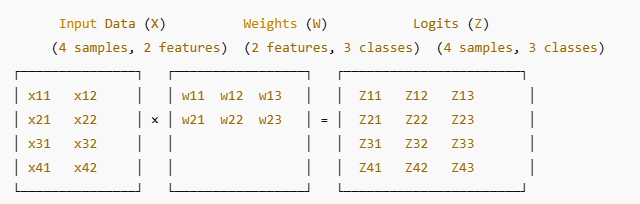

In [ ]:
file = '/content/Capture3.PNG'
display(Image(filename=file, embed=True, width=590, height=230))

## Part 2: Applying Softmax - Converting Logits to Probabilities


* Logits (Z) are raw scores that result from a linear transformation (XW+b). However, these values do not represent probabilities (i.e., they don’t sum to 1).

* Softmax gives normalized probabilities.



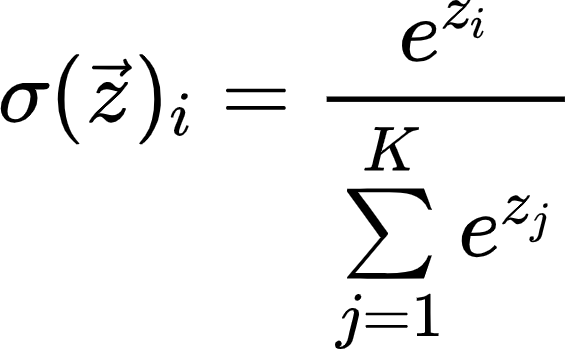

In [ ]:
file = '/content/1_bol3L-WNVacCscvG-rlypQ.png'
display(Image(filename=file, embed=True, width=250, height=150))

In [ ]:
print('Z:')
print(Z)


Z:
[[ 1.70000000e+00 -5.00000000e-01  7.00000000e-01]
 [ 2.30000000e+00  2.77555756e-17 -2.00000000e-01]
 [ 1.50000000e+00 -9.00000000e-01  1.40000000e+00]
 [ 1.50000000e+00 -1.60000000e+00  2.60000000e+00]]


In [ ]:
# Implementing softmax on our example
# We got 4x3 logit matrix



# Apply softmax
exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))  # Stability trick
softmax_probs = exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

prob_sum = np.sum(softmax_probs,axis=1,keepdims=True)

# Print results
print("Logits (Z):")
print(Z)
print("\nSoftmax Probabilities:")
print(softmax_probs)

print('\nprobabilities sum for each sample:')
print(prob_sum)


Logits (Z):
[[ 1.70000000e+00 -5.00000000e-01  7.00000000e-01]
 [ 2.30000000e+00  2.77555756e-17 -2.00000000e-01]
 [ 1.50000000e+00 -9.00000000e-01  1.40000000e+00]
 [ 1.50000000e+00 -1.60000000e+00  2.60000000e+00]]

Softmax Probabilities:
[[0.67627765 0.0749337  0.24878865]
 [0.84577765 0.08479669 0.06942566]
 [0.50111363 0.04546    0.45342636]
 [0.24696143 0.01112542 0.74191315]]

probabilities sum for each sample:
[[1.]
 [1.]
 [1.]
 [1.]]


* Subtracting np.max(Z, axis=1, keepdims=True) prevents overflow when exponentiating large values. And rest we have just implemented the formula.

* the shape of the matrix remain same 4x3
* each sample sum should be one

* now we got our probabilities matrix

## Part 3: Computing the Loss Function


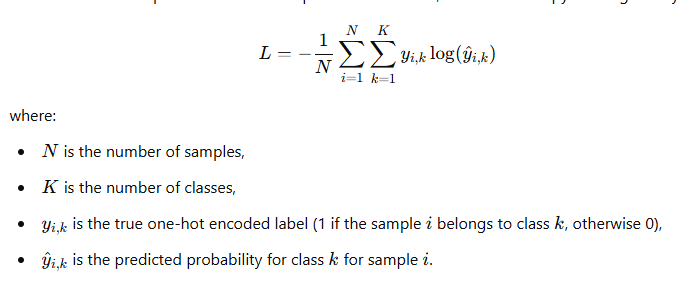

In [ ]:
file = '/content/Screenshot (11).png'
display(Image(filename=file, embed=True, width=750, height=350))

* We will calculate our loss on our softmax probabilities (4x3)
* Clip y_pred: Ensures no probability is exactly 0, avoiding log(0) issues

In [ ]:
samples = softmax_probs.shape[0]

# Prevent log(0) issues by clipping probabilities
y_pred_clipped = np.clip(softmax_probs, 1e-7, 1 - 1e-7)

print('y_pred_clipped:')
print(y_pred_clipped)

y_pred_clipped:
[[0.67627765 0.0749337  0.24878865]
 [0.84577765 0.08479669 0.06942566]
 [0.50111363 0.04546    0.45342636]
 [0.24696143 0.01112542 0.74191315]]




* The loss function only considers the predicted probability of the correct class

* For each sample, we extract the predicted probability of the correct class and take its negative logarithm.

* correct_confidences will be a 1d array of size equal to number of samples i.e (4,)

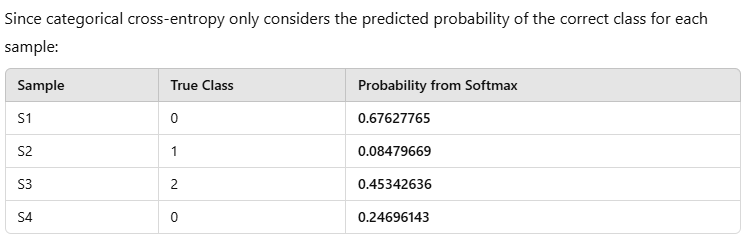

In [ ]:
file = '/content/Capture5.PNG'
display(Image(filename=file, embed=True, width=800, height=250))

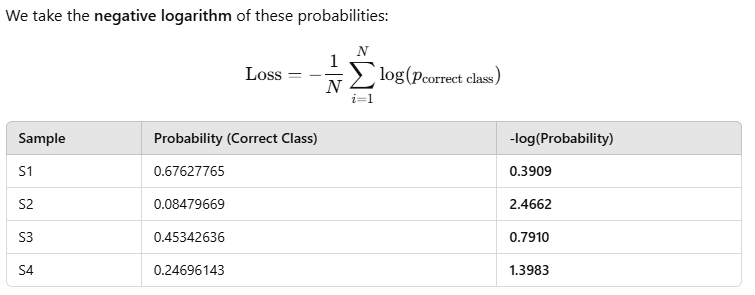

In [ ]:
file = '/content/Capture6.PNG'
display(Image(filename=file, embed=True, width=650, height=250))

In [ ]:
# Extract the predicted probability of the correct class for each sample
correct_confidences = y_pred_clipped[range(samples), y]   # y = np.array([0, 1, 2, 0])
print('correct_confidences:')
print(correct_confidences)

correct_confidences:
[0.67627765 0.08479669 0.45342636 0.24696143]


* Taking the negative log and compute the mean loss

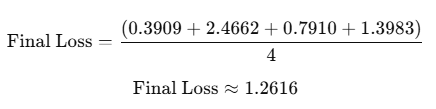

In [ ]:
file = '/content/Capture7.PNG'
display(Image(filename=file, embed=True, width=320, height=120))

In [ ]:
loss = -np.mean(np.log(correct_confidences))
print(f'loss: {loss}')

loss: 1.262023953914368


## Part 4: Backpropagation - Computing Gradients


Differentiation of the Loss Function

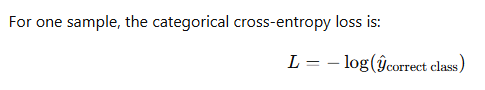

In [ ]:
file = '/content/Capture10.PNG'
display(Image(filename=file, embed=True, width=400, height=110))

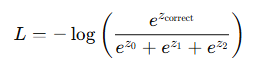

In [ ]:
file = '/content/Capture11.PNG'
display(Image(filename=file, embed=True, width=300, height=100))

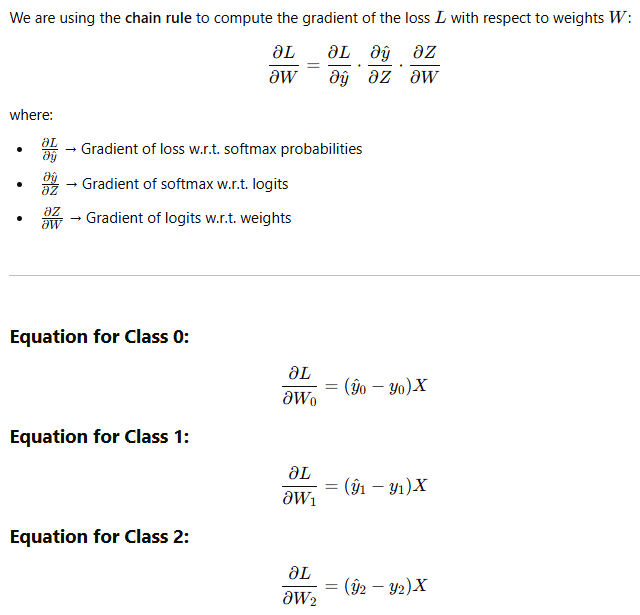

In [ ]:
file = '/content/Capture12.PNG'
display(Image(filename=file, embed=True, width=700, height=700))

Understanding Derivative of Softmax Probabilities w.r.t. Logits

---

* When we apply softmax, we transform raw logits 𝑧 into probabilities ŷ
Now, we need to compute how these probabilities change with respect to the logits.

* There will be 2 cases, differentiating w.r.t same class logits and different class logits.

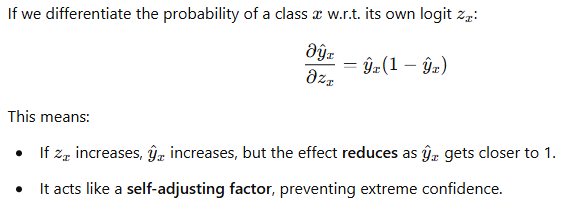

In [ ]:
file = '/content/Capture8.PNG'
display(Image(filename=file, embed=True, width=500, height=220))

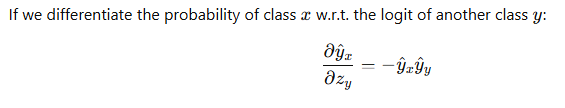

In [ ]:
file = '/content/Capture9.PNG'
display(Image(filename=file, embed=True, width=500, height=130))

Breaking Down the Gradient Calculation (Using the Chain Rule)

---

* Our goal is to compute the gradient of the loss w.r.t. the weigh (W). But since we have softmax in between, we need to apply the chain rule step by step.


What we need to compute?
We need:

dL/dW

Where L is the loss function and W are the weights.



Applying the Chain Rule
Since softmax introduces intermediate probabilities (ŷ), we decompose this into three parts:

1️⃣ Loss w.r.t. Probabilities:

∂L/∂ŷ

This tells us how the loss changes with respect to softmax probabilities.

2️⃣ Probabilities w.r.t. Logits (Softmax Derivative):

∂ŷ/∂Z


This tells us how probabilities change when logits change.

3️⃣ Logits w.r.t. Weights (Linear Transformation Derivative):

∂Z/∂W


This tells us how logits change when weights change.


Using the chain rule, we multiply these three derivatives:

∂L/∂W = ∂L/∂ŷ . ∂ŷ/∂Z . ∂Z/∂W

* First we'll Compute
∂L/∂Z (Derivative of Loss w.r.t. Logits)


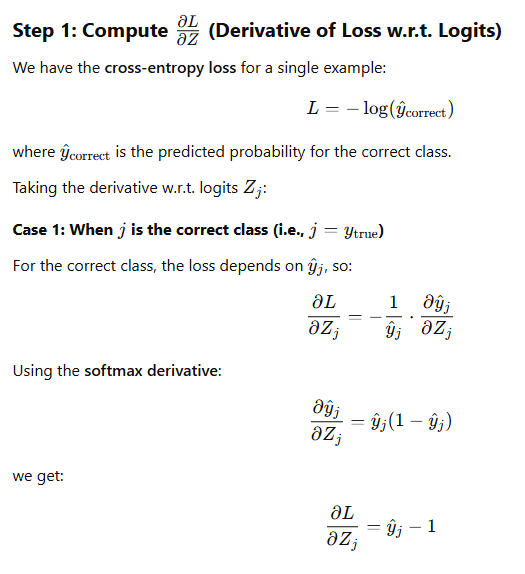

In [ ]:
file = '/content/Capture13.PNG'
display(Image(filename=file, embed=True, width=550, height=630))

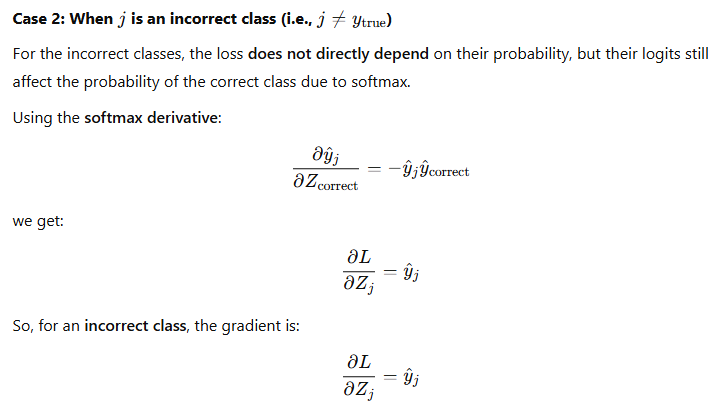

In [ ]:
file = '/content/Capture14.PNG'
display(Image(filename=file, embed=True, width=650, height=430))

* We first calculate the gradients of loss wrt logits on our example of 4x2 softmax_probs matrix

In [ ]:
softmax_probs

array([[0.67627765, 0.0749337 , 0.24878865],
       [0.84577765, 0.08479669, 0.06942566],
       [0.50111363, 0.04546   , 0.45342636],
       [0.24696143, 0.01112542, 0.74191315]])

In [ ]:
softmax_probs[range(softmax_probs.shape[0]), y] -= 1
softmax_probs

array([[-0.32372235,  0.0749337 ,  0.24878865],
       [ 0.84577765, -0.91520331,  0.06942566],
       [ 0.50111363,  0.04546   , -0.54657364],
       [-0.75303857,  0.01112542,  0.74191315]])

* The correct class's probability is reduced by 1, making it negative.
* The other probabilities remain the same.
* This transformation is important because it simplifies the gradient computation, allowing us to multiply with
𝑋 directly to get the weight gradients

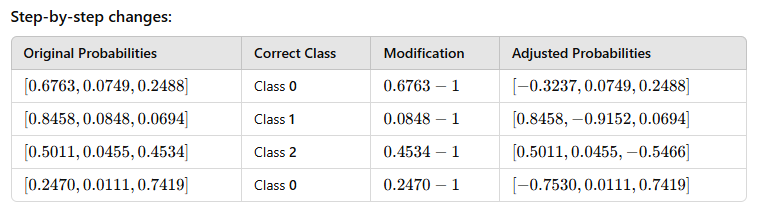

In [ ]:
file = '/content/Capture17.PNG'
display(Image(filename=file, embed=True, width=630, height=200))

Now we can calculate Gradient w.r.t. Weights and Biases

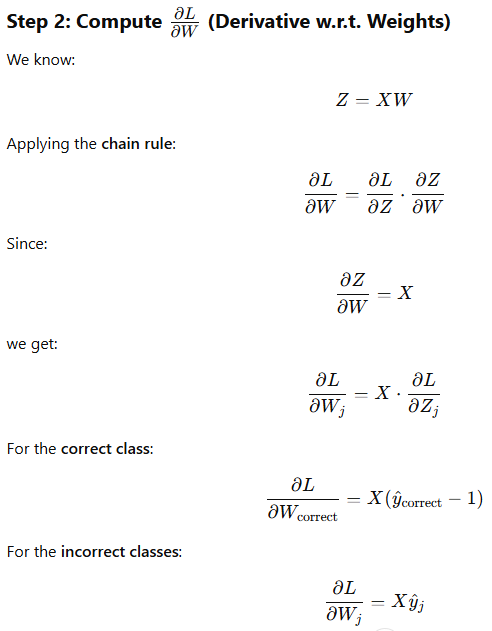

In [ ]:
file = '/content/Capture15.PNG'
display(Image(filename=file, embed=True, width=330, height=400))

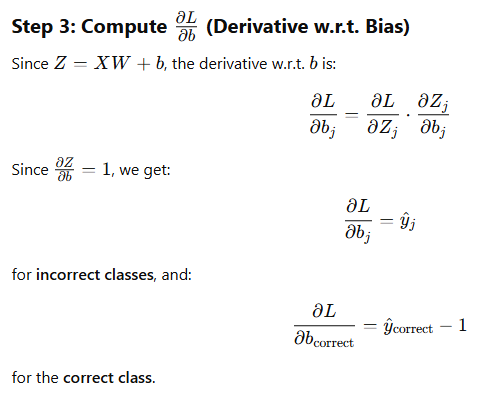

In [ ]:
file = '/content/Capture16.PNG'
display(Image(filename=file, embed=True, width=400, height=400))

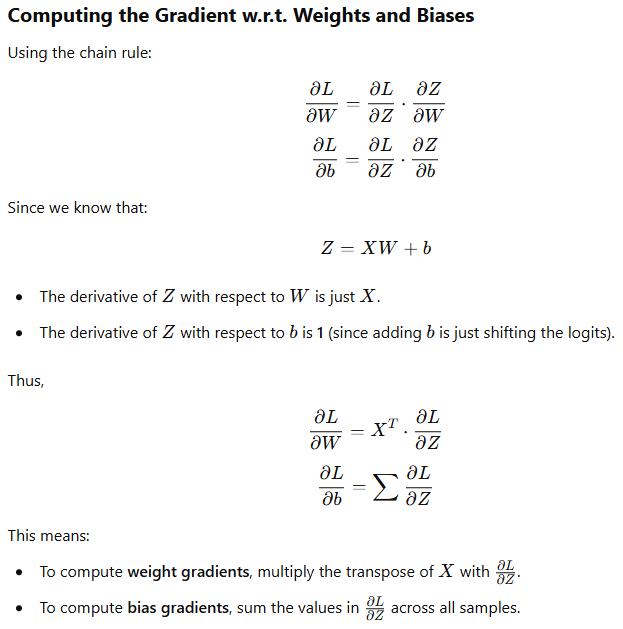

In [ ]:
file = '/content/Capture18.PNG'
display(Image(filename=file, embed=True, width=500, height=500))

* we can calculate the gradients on our example

In [ ]:
grad_W =  np.dot(X.T, softmax_probs)
grad_b = np.sum(softmax_probs, axis=0, keepdims=True)

print('grad_W:')
print(grad_W)
print('\ngrad_b:')
print(grad_b)

grad_W:
[[-2.06351897 -0.57332882  2.63684779]
 [ 3.50690993 -4.24917003  0.7422601 ]]

grad_b:
[[ 0.27013037 -0.78368419  0.51355382]]


In [ ]:
#      X (4x2)   @   dL/dZ (4x3)  --->  dL/dW (2x3)
#    ┌────────┐   ┌──────────┐   ┌──────────┐
#    │ x11 x12│   │ g11 g12 g13│   │ w11 w12 w13│
#    │ x21 x22│ @ │ g21 g22 g23│ = │ w21 w22 w23│
#    │ x31 x32│   │ g31 g32 g33│
#    │ x41 x42│   │ g41 g42 g43│

#    Summing over rows:

#      dL/dZ (4x3)  --->  dL/db (1x3)
#    ┌──────────┐   ┌──────────┐
#    │ g11 g12 g13│   │ b1  b2  b3 │
#    │ g21 g22 g23│   └──────────┘
#    │ g31 g32 g33│
#    │ g41 g42 g43│


In [ ]:
# dL/dW =
# ┌───────┬───────┬───────┐
# │ w11   │ w12   │ w13   │   <-- Feature 1 gradients for all classes
# │ w21   │ w22   │ w23   │   <-- Feature 2 gradients for all classes
# └───────┴───────┴───────┘


# dL/db =
# ┌───────┬───────┬───────┐
# │ b1    │ b2    │ b3    │  <-- Bias gradients for all classes
# └───────┴───────┴───────┘


## Part 5: Updating Weights & Making Predictions


* Now that we have computed the gradients for the weights, we update them using gradient descent.

In [ ]:
W -= 0.01 * grad_W
b -= 0.01 * grad_b

print('Updated Weights:')
print(W)
print('\nUpdated Biases:')
print(b)

Updated Weights:
[[ 0.22063519 -0.29426671  0.47363152]
 [ 0.3649309   0.1424917  -0.2074226 ]]

Updated Biases:
[[ 0.0972987  -0.19216316  0.29486446]]


In [ ]:
prediction = np.dot(X, W) + b

print('\nprediction:')
print(prediction)


prediction:
[[ 1.63336178 -0.35322148  0.6198597 ]
 [ 2.14258839  0.22602863 -0.26861702]
 [ 1.48906607 -0.78997989  1.30091383]
 [ 1.56540555 -1.52100502  2.45559947]]


In [ ]:
exp_p = np.exp(prediction - np.max(prediction, axis=1, keepdims=True))  # Stability trick
softmax_probs = exp_p / np.sum(exp_p, axis=1, keepdims=True)
softmax_probs

array([[0.66661824, 0.09143554, 0.24194622],
       [0.80852555, 0.11894397, 0.07253048],
       [0.51790115, 0.05302367, 0.42907518],
       [0.2872517 , 0.01311751, 0.69963079]])

In [ ]:
probabilities = np.argmax(softmax_probs,axis=1,keepdims=True)
probabilities

array([[0],
       [0],
       [0],
       [2]])

## Softmax Regression Class Code

In [252]:
class SoftmaxRegression:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.losses = []

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability trick
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def categorical_cross_entropy(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)  # Clip probabilities
        correct_confidences = y_pred_clipped[range(samples), y_true]
        return -np.mean(np.log(correct_confidences + 1e-7))  # Alternative stability fix

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        # Weights Initialization
        self.weights = np.random.randn(n_features, n_classes)
        self.bias = np.zeros((1, n_classes))

        for epoch in range(self.epochs):
            logits = np.dot(X, self.weights) + self.bias
            y_pred = self.softmax(logits)

            # Compute loss
            loss = self.categorical_cross_entropy(y_pred, y)
            self.losses.append(loss)

            # Adjust y_pred for gradient calculation
            y_pred_adjusted = y_pred.copy()
            y_pred_adjusted[range(n_samples), y] -= 1

            # Compute gradients
            dw = np.dot(X.T, y_pred_adjusted) / n_samples
            db = np.sum(y_pred_adjusted, axis=0, keepdims=True) / n_samples

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        logits = np.dot(X, self.weights) + self.bias
        y_pred = self.softmax(logits)
        return np.argmax(y_pred, axis=1)  # Return class with highest probability

    def plot_loss(self):
        plt.figure(figsize=(6, 4))
        plt.plot(range(1, self.epochs + 1), self.losses, label="Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Epoch vs Loss")
        plt.legend()
        plt.savefig("loss_plot.png")
        plt.show()


## Testing and Plotting

* Importing iris data. We'll use its 2 features Sepal Length and Sepal Width and 3 classes (setosa, versicolor, virginica) in output column (species)

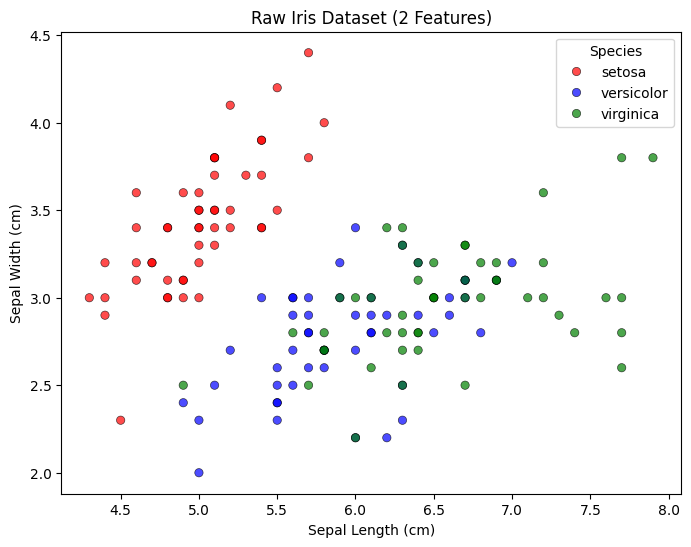

X_train shape: (120, 2)
X_test shape: (30, 2)
y_train shape: (120,)
y_test shape: (30,)


In [253]:
# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Select only two features
df = df.iloc[:, [0, 1]]
df["species"] = iris.target  # Add species labels (0, 1, 2)

# Map species labels to actual names
df["species"] = df["species"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

# Define custom colors for species
custom_palette = {"setosa": "red", "versicolor": "blue", "virginica": "green"}

# Plot the raw data
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df.iloc[:, 0],  # Sepal Length
    y=df.iloc[:, 1],  # Sepal Width
    hue=df["species"],  # Color by species
    palette=custom_palette,
    edgecolor="k",
    alpha=0.7
)

# Labels and title
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Raw Iris Dataset (2 Features)")
plt.legend(title="Species")
plt.show()

# Step 3: Standardize features
X = df.iloc[:, [0, 1]].values  # Extract feature columns
y = df["species"].map({"setosa": 0, "versicolor": 1, "virginica": 2}).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize features

# Step 4: Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print dataset shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


* Training the model

In [254]:
model = SoftmaxRegression(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

Epoch 0, Loss: 1.0293
Epoch 100, Loss: 0.8260
Epoch 200, Loss: 0.7110
Epoch 300, Loss: 0.6447
Epoch 400, Loss: 0.6043
Epoch 500, Loss: 0.5778
Epoch 600, Loss: 0.5591
Epoch 700, Loss: 0.5453
Epoch 800, Loss: 0.5344
Epoch 900, Loss: 0.5257


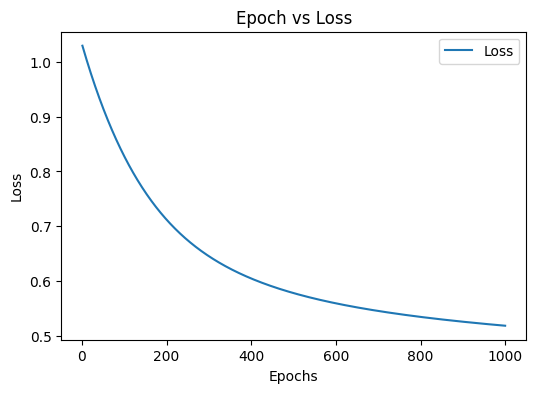

In [255]:
model.plot_loss()

* Predictions

In [256]:
y_pred = model.predict(X_test)

In [265]:
def pred_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

* Calculating accuracy

In [266]:
accuracy = pred_accuracy(y_test, y_pred)
accuracy

0.9

In [267]:
with open("accuracy.txt", "w") as f:
    f.write(f"Final Model Accuracy: {accuracy * 100:.2f}%")


* Got model weights

In [259]:
print('model weights:')
print(model.weights,'\n')
print('model bias:')
print(model.bias)

model weights:
[[-1.50612682  0.16145149  0.8398582 ]
 [ 0.4943757  -1.29366443 -0.69588132]] 

model bias:
[[-0.2982747   0.15741132  0.14086337]]


* Plotting the decision boundary on training dataset

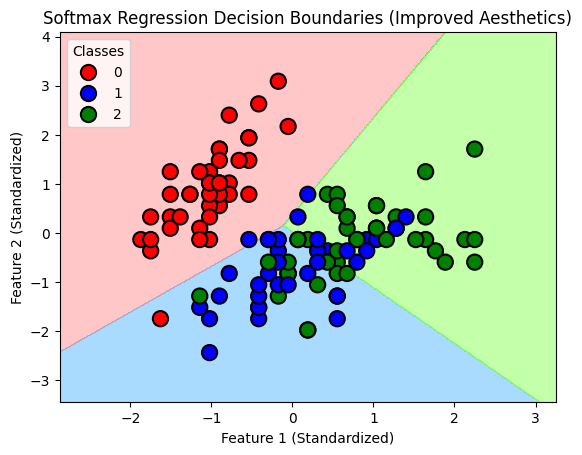

In [260]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

def plot_decision_boundaries(X, y, weights, bias):
    # Define a HIGH-RESOLUTION mesh grid for smooth boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # Flatten the grid and compute logits
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    logits = grid_points @ weights + bias  # Softmax inputs
    predictions = np.argmax(logits, axis=1)  # Get predicted class labels
    Z = predictions.reshape(xx.shape)

    # Define custom light colors for decision regions
    custom_cmap = mcolors.ListedColormap(["#ff9090", "#55b6ff", "#8aff57"])

    # Plot the decision boundaries with the custom colormap
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=custom_cmap)

    # Scatter plot of training points
    scatter = sns.scatterplot(
        x=X[:, 0], y=X[:, 1], hue=y, palette=["red", "blue", "green"],
        edgecolor="black", s=120, alpha=1.0, linewidth=1.5
    )

    # Fix legend position and alignment
    handles, labels = scatter.get_legend_handles_labels()
    scatter.legend(handles, labels, title="Classes", loc="upper left")

    # Labels and title
    plt.xlabel("Feature 1 (Standardized)")
    plt.ylabel("Feature 2 (Standardized)")
    plt.title("Softmax Regression Decision Boundaries (Improved Aesthetics)")

    plt.savefig("decision_boundary.png")
    plt.show()


plot_decision_boundaries(X_train, y_train, model.weights, model.bias)
